In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, cm
from matplotlib import colors
import matplotlib
from scipy.special import legendre

# Answers

You can edit this Jupyter notebook to include your answers and run any code that generates those answers or produces plots.  You can add additional cells for code or markdown as needed. This homework is primarily about having fun with interpolation. If any question is unclear, or there are any typos, let us know!

# IMPORTANT: Run the file in order since the naming is repeatedly used.

## Problem 0 (20 points)

In this problem you will play around with interpolation using the monomial basis.

### Part A (5 points)

Given a collection of $N$ points $x_0,\dots,x_{N-1}$ we can define the *Vandermonde* matrix $V$ by
$$V_{i,j} = x_i^j$$
where $j$ goes from $0$ to $M-1$ and $i$ goes from $0$ to $N-1.$ The first column should consist of ones. Construct a function which takes in a collection of points $x_0,\dots,x_{N-1}$ stored as a numpy array, and an integer $M$, and outputs the corresponding Vandermonde matrix. 

*Your answer here.  You can create some code cells as well*

In [2]:
def Vand(x,m):
    """
    This function returns the Vandermonde matrix with each row as the powers of elements of x, with m columns.
    The input x should be a 1d numpy array consisting of numbers, 
    m should be a positive integer.
    """
    n = len(x)
    V = np.empty([n,m])
    for i in range(n):
        for j in range(m):
            V[i,j] = x[i]**j
    return V

In [3]:
x = [1,1,2,3,4]
v = Vand(x,3)
v

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

### Part B (5 points)

Suppose we are given a function $f$ defined by
$$f(x) := c_0 x^0 +c_1 x^1 +\cdots +c_{3} x^{3}.$$
Let's sample it at four points $x=-1/2,$ $x=1/3,$ $x=1/2,$ and $x=1.$ When we do this, we will get values (of $f$) $f_0$, $f_1,$ $f_2,$ and $f_3.$ Write a linear system relating the coefficients $c_0,c_1,c_2,c_3$ in terms of the samples $f_0,$ $f_1,$ $f_2,$ $f_3.$

Then, generalize this result using Vandermonde matrices: write down an expression for the linear system relating the coefficients $c_0,c_1,\dots,c_{M-1}$ with the sample values $f_0,f_1,\dots,f_{N-1}.$ 

---

It's not hard to see that the linear system is:
$$\left(\begin{array}{cccc}
    1 & -1/2& (-1/2)^2 &(-1/2)^3  \\
    1 & 1/3& (1/3)^2 &(1/3)^3  \\
    1 & 1/2& (1/2)^2 &(1/2)^3  \\
    1 & 1& 1 & 1
\end{array}\right)\left(\begin{array}{c}
     c_0  \\
     c_1 \\
     c_2 \\
     c_3
\end{array}\right) = \left(\begin{array}{c}
     f_0  \\
     f_1 \\
     f_2 \\
     f_3
\end{array}\right)$$

where the matrix is nothing but the Vandermonde matrix at the valued points. 

Therefore, in general, let $$V: = Vand(x_0,\dots,x_{N-1}; M)$$ be the Vandermonde matrix generated by the evalueated points and $M$ degree. We then have:
$$V\left(\begin{array}{c}
     c_0  \\
     \vdots \\
     c_{M-1}
\end{array}\right) = \left(\begin{array}{c}
     f_0  \\
     \vdots \\
     f_{N-1}
\end{array}\right)$$
as out linear system.

### Part C (5 points)


Taking equispaced samples on the interval $[-1,1],$ compute the condition number of the Vandermonde matrix for various values of $N$ and $M$ (number of samples and number of polynomials, respectively).  Here you should take $N \ge M.$ For the square case ($N=M$), can you find the rough behavior of the condition number as a function of $N$? Numpy has a condition number routine "numpy.linalg.cond" which might help. For plotting inspiration, you can use a similar plot that we used for the agent-based modeling unit (play around with log scaling to make the plots more informative).

---

*Your answer here.  You can create some code cells as well*


In [4]:
# Create a list of degree and a list of their conditional numbers.
nl = []
cdl = []
for j in range(2,100):
    n = j
    nl.append(n)
    xl = np.linspace(-1,1,n-1)
    V = Vand(xl,n)
    h = np.linalg.cond(V)
    cdl.append(h)

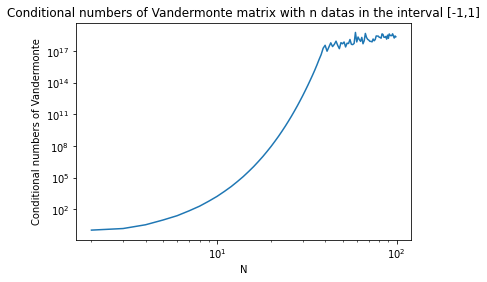

In [5]:
plt.loglog(nl,cdl)

plt.xlabel("N")
plt.ylabel("Conditional numbers of Vandermonte")
plt.title("Conditional numbers of Vandermonte matrix with n datas in the interval [-1,1]")
plt.show()

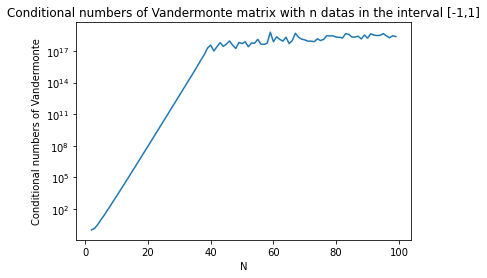

In [6]:
plt.semilogy(nl,cdl)
plt.xlabel("N")
plt.ylabel("Conditional numbers of Vandermonte")
plt.title("Conditional numbers of Vandermonte matrix with n datas in the interval [-1,1]")

plt.show()

So as we can see, the conditional number is growing super-exponentially in the beginning and starts to decay in growth when $n$ is close to 100. Possible reason is that the computation of such a big matrix concerns some very small conputations, where we've reached $\epsilon$.

### Part D (5 points)

Compute the error in evaluating $f(x) = \exp(x)$ at $x=1/\pi$ by interpolating from $N$ points on $[-1,1]$ onto the first $M$ monomials, i.e. using the results of Part B. Do this by first finding the coefficients $c_0,\dots,c_{M-1}$ and then evaluating the sum $c_0 x^0+ \dots c_{M-1} x^{M-1}$ at $x=1/\pi.$

---

I first plotted when $M = N$. Then, I tried to do for all $N\ge M$.

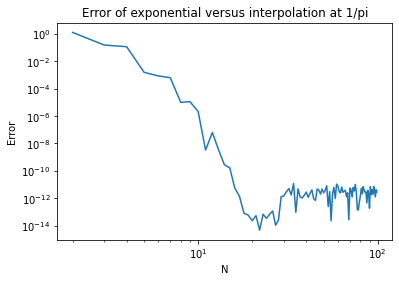

In [7]:
# Create a list of degree and a list of their conditional numbers.
nl = []
Errl = []
for j in range(2,100):
    n = j
    nl.append(n)
    xl = np.linspace(-1,1,n-1)
    V = Vand(xl,n)
    b = np.exp(xl)
    vpi = np.linalg.pinv(V)
    c = np.matmul(vpi,b)
    ip = 1/(np.pi)
    use1 = Vand([ip],n)
    use = np.inner(c,use1)
    err = abs(np.exp(ip)-use)
    Errl.append(err)
plt.loglog(nl,Errl)
plt.xlabel("N")
plt.ylabel("Error")
plt.title("Error of exponential versus interpolation at 1/pi")

plt.show()

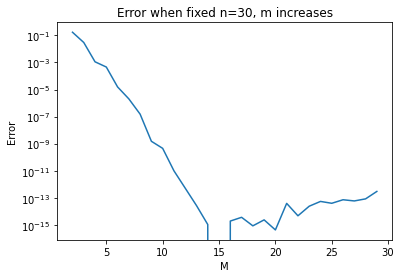

In [8]:
n = 30
# Create a list of degree and a list of their conditional numbers.
ml = []
Errl = []
for m in range(2,30):
    ml.append(m)
    xl = np.linspace(-1,1,n)
    V = Vand(xl,m)
    b = np.exp(xl)
    vpi = np.linalg.pinv(V)
    c = np.matmul(vpi,b)
    ip = 1/(np.pi)
    use1 = Vand([ip],m)
    use = np.inner(c,use1)
    err = abs(np.exp(ip)-use)
    Errl.append(err)
plt.semilogy(ml,Errl)
plt.xlabel("M")
plt.ylabel("Error")
plt.title("Error when fixed n=30, m increases")

plt.show()

So we can see that indeed, no matter whether we fix $n=m$ or we fix $n$ and increase $m$, the result will both converge.

In [18]:
# Create a list of degree and a list of their conditional numbers.
Error = np.empty([100,100])
nl = []
ml = []
for j in range(2,100):
    for m in range(1,j+1):
        n = j
        nl.append(n)
        ml.append(m)
        xl = np.linspace(-1,1,n)
        V = Vand(xl,m)
        b = np.exp(xl)
        vpi = np.linalg.pinv(V)
        c = np.matmul(vpi,b)
        ip = 1/(np.pi)
        use1 = Vand([ip],m)
        use = np.inner(c,use1)
        err = abs(np.exp(ip)-use)
        Error[m,n] = err

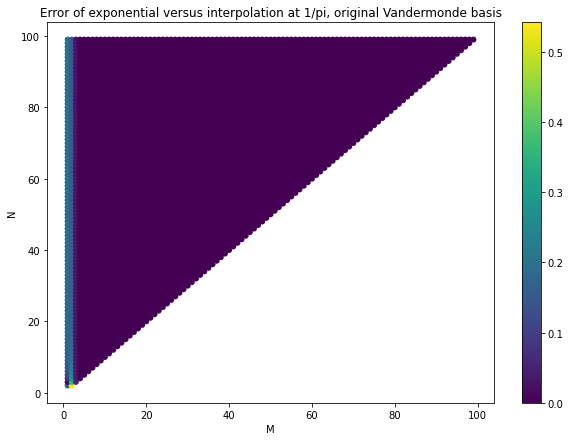

Text(0.5, 1.0, 'Log sized Error of exponential versus interpolation at 1/pi, original Vandermonde basis')

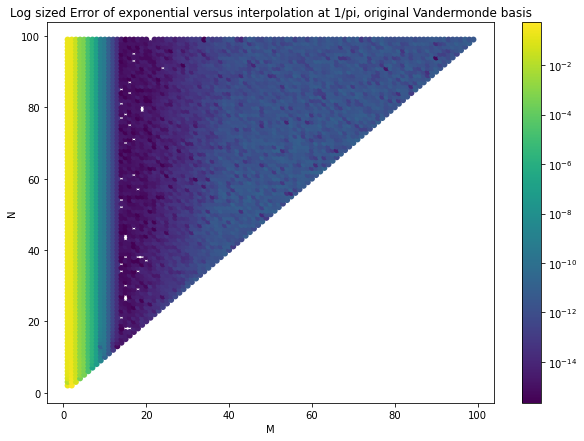

In [19]:
fig = plt.figure(figsize=(10,7))
plt.scatter(ml,nl,edgecolors='none',c=Error[ml,nl])
plt.colorbar()
plt.xlabel("M")
plt.ylabel("N")
plt.title("Error of exponential versus interpolation at 1/pi, original Vandermonde basis")
plt.show()
fig = plt.figure(figsize=(10,7))

plt.scatter(ml,nl,edgecolors='none',c=Error[ml,nl],norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.xlabel("M")
plt.ylabel("N")
plt.title("Log sized Error of exponential versus interpolation at 1/pi, original Vandermonde basis")

## Problem 1 (30 points)

### Part A (10 points)

Redo Part A through D of Problem 0 with the the functions $1,\cos(\pi x), \sin(\pi x), \cos(2 \pi x), \sin(2\pi x),\cos(3 \pi x), \sin(3 \pi x), \dots, \cos( M \pi x), \sin ( M \pi x).$ 

In place of the Vandermonde matrix, consider the matrix $V$ with $V_{i,j} = \phi_j(x_i),$ where the $\phi_j$'s are the collection of cosine and sine functions given above. In this case, when using equispaced points, include the $x=-1$ endpoint but not the other ($x=1$) in your sample points.

---

*Your answer here.  You can create some code cells as well*

In [11]:
def Vandtrig(x,m):
    """
    This function returns the Vandermonde matrix with each row as sines and cosines of x, with m columns.
    These m has 1 column of 1, about have cosines and about half sines.
    The input x should be a 1d numpy array consisting of numbers, 
    m should be a positive integer.
    """
    n = len(x)
    V = np.empty([n,m])
    for i in range(n):
        for j in range(m):
            if j == 0:
                V[i,j] = 1
            elif j%2 == 1:
                V[i,j] = np.cos(np.pi*x[i]*((j+1)/2))
            else:
                V[i,j] = np.sin(np.pi*x[i]*(j/2))
    return V

In [12]:
x = [1,2,3]
v = Vandtrig(x,3)
v

array([[ 1.0000000e+00, -1.0000000e+00,  1.2246468e-16],
       [ 1.0000000e+00,  1.0000000e+00, -2.4492936e-16],
       [ 1.0000000e+00, -1.0000000e+00,  3.6739404e-16]])

Here, the linear system is (for the question in part B, where I take $m=1$ to make sure $n\ge 2m+1$):
$$\left(\begin{array}{cccc}
    1 & \sin -1/2& \cos -1/2 &\sin(2*(-1/2))\\ 
    1 &  \sin 1/3&  \cos 1/3  &\sin(2*(1/3)) \\
    1 &  \sin1/2& \cos 1/2 &\sin(2*(1/2))\\
    1 &  \sin1& \cos 1 &\sin(2*1)
\end{array}\right)\left(\begin{array}{c}
     c_0  \\
     c_1 \\
     c_2 \\
     c_3
\end{array}\right) = \left(\begin{array}{c}
     f_0  \\
     f_1 \\
     f_2 \\
     f_3
\end{array}\right)$$

In general, let $$V: = Vandtrig(x_0,\dots,x_{N-1}; M)$$ be the Vandermonde matrix with respect to triangular basis generated by the evalueated points of $2M+1$ degrees. We then have:
$$V\left(\begin{array}{c}
     c_0  \\
     \vdots \\
     c_{2M}
\end{array}\right) = \left(\begin{array}{c}
     f_0  \\
     \vdots \\
     f_{N-1}
\end{array}\right)$$
as out linear system.

In [21]:
# Create a list of degree and a list of their conditional numbers.
nl = []
cdl = []
for j in range(2,100):
    n = j
    nl.append(n)
    xl = np.linspace(-1,1,n,endpoint = False)
    V = Vandtrig(xl,n)
    h = np.linalg.cond(V)
    cdl.append(h)

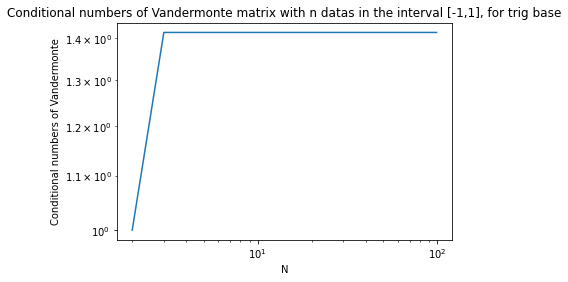

In [22]:
plt.loglog(nl,cdl)
plt.xlabel("N")
plt.ylabel("Conditional numbers of Vandermonte")
plt.title("Conditional numbers of Vandermonte matrix with n datas in the interval [-1,1], for trig base")

plt.show()

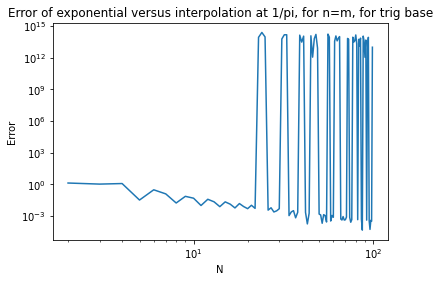

In [26]:
# Create a list of degree and a list of their conditional numbers.
nl = []
Errl = []
for j in range(2,100):
    n = j
    nl.append(n)
    xl = np.linspace(-1,1,n-1)
    V = Vandtrig(xl,n)
    b = np.exp(xl)
    vpi = np.linalg.pinv(V)
    c = np.matmul(vpi,b)
    use1 = Vandtrig([ip],n)
    use = np.inner(c,use1)
    err = abs(np.exp(ip)-use)
    Errl.append(err)
plt.loglog(nl,Errl)
plt.xlabel("N")
plt.ylabel("Error")
plt.title("Error of exponential versus interpolation at 1/pi, for n=m, for trig base")

plt.show()

This is extremely strange as the error will fluctrate tremendously. I will explain later why this makes sence with the 2d graph.

For now, let's look at if we fix $n= 2m+1$ ,will it still be bad. I did this because in practice cos and sin comes in pairs. Thus, if we use only one of them, say only $\cos(200\pi x)$ but not $\sin(200\pi x)$, the fluctuation might not be canceled.

So indeed, if we let $n= 2m+1$, the error, though still fluctuating, is upper bounded by a decreacing curve.

Also, we might try to fix $n$ and increase $m$. This is also done and well behaved.

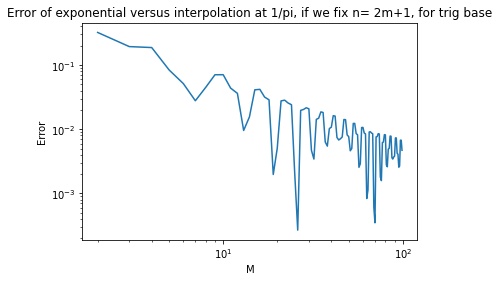

In [27]:
# Create a list of degree and a list of their conditional numbers.
ml = []
Errl = []
for j in range(2,100):
    m = j
    ml.append(m)
    xl = np.linspace(-1,1,2*m+1)
    V = Vandtrig(xl,m)
    b = np.exp(xl)
    vpi = np.linalg.pinv(V)
    c = np.matmul(vpi,b)
    use1 = Vandtrig([ip],m)
    use = np.inner(c,use1)
    err = abs(np.exp(ip)-use)
    Errl.append(err)
plt.loglog(ml,Errl)
plt.xlabel("M")
plt.ylabel("Error")
plt.title("Error of exponential versus interpolation at 1/pi, if we fix n= 2m+1, for trig base")

plt.show()

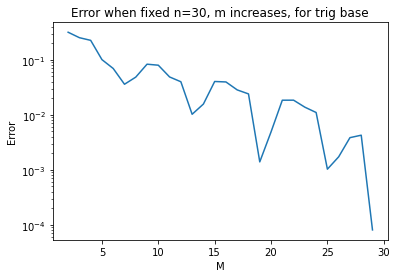

In [28]:
n = 30
# Create a list of degree and a list of their conditional numbers.
ml = []
Errl = []
for m in range(2,30):
    ml.append(m)
    xl = np.linspace(-1,1,n)
    V = Vandtrig(xl,m)
    b = np.exp(xl)
    vpi = np.linalg.pinv(V)
    c = np.matmul(vpi,b)
    ip = 1/(np.pi)
    use1 = Vandtrig([ip],m)
    use = np.inner(c,use1)
    err = abs(np.exp(ip)-use)
    Errl.append(err)
plt.semilogy(ml,Errl)
plt.xlabel("M")
plt.ylabel("Error")
plt.title("Error when fixed n=30, m increases, for trig base")

plt.show()

In [29]:
# Create a list of degree and a list of their conditional numbers.
Error = np.empty([100,100])
nl = []
ml = []
for j in range(2,100):
    for m in range(1,j+1):
        n = j
        nl.append(n)
        ml.append(m)
        xl = np.linspace(-1,1,n)
        V = Vandtrig(xl,m)
        b = np.exp(xl)
        vpi = np.linalg.pinv(V)
        c = np.matmul(vpi,b)
        ip = 1/(np.pi)
        use1 = Vandtrig([ip],m)
        use = np.inner(c,use1)
        err = abs(np.exp(ip)-use)
        Error[m,n] = err

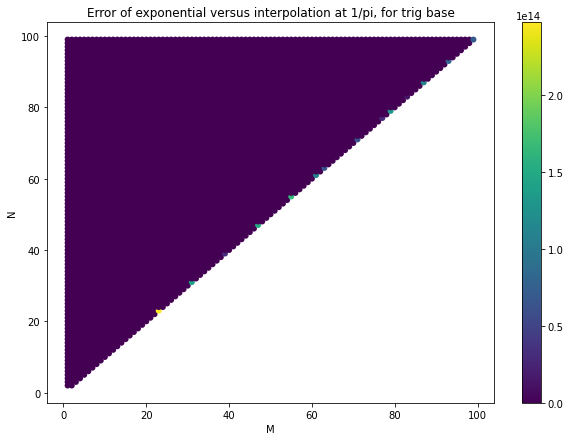

Text(0.5, 1.0, 'Log sized Error of exponential versus interpolation at 1/pi, for trig base')

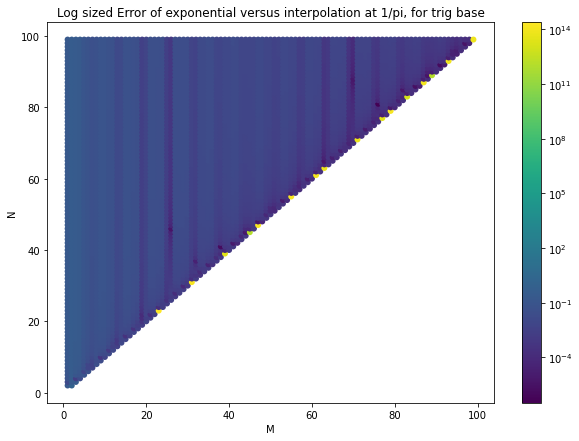

In [30]:
fig = plt.figure(figsize=(10,7))
plt.scatter(ml,nl,edgecolors='none',c=Error[ml,nl])
plt.colorbar()
plt.xlabel("M")
plt.ylabel("N")
plt.title("Error of exponential versus interpolation at 1/pi, for trig base")
plt.show()
fig = plt.figure(figsize=(10,7))

plt.scatter(ml,nl,edgecolors='none',c=Error[ml,nl],norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.xlabel("M")
plt.ylabel("N")
plt.title("Log sized Error of exponential versus interpolation at 1/pi, for trig base")

So we see that the behavior error when $n=m$ is really due to some strange overfitting. We can see that when n>m (even when by 1) the graph will be extremely good. This also explains all our observations above, such as huge fluctuations when $n=m$, corresponding to the diagonal; good decay when $n= 2m+1$, corresponding to the line with slope $2$.

### Part B (10 points)

Legendre polynomials are another frequently encountered family of polynomials used for interpolation. Repeat Part A through D of Problem 0 using a Legendre basis. Hint: look at the routines in "numpy.legendre", particularly "numpy.legendre.legvander" and numpy."legendre.legval".

---

*Your answer here.  You can create some code cells as well*

In [31]:
def Vandleg(x,m):
    """
    This function returns the Vandermonde matrix with each row as sines and cosines of x, with 2m+1 columns.
    These 2m+1 has 1 column of 1, m columns of sine and m columns of cosine.
    The input x should be a 1d numpy array consisting of numbers, 
    m should be a positive integer.
    """
    V = np.polynomial.legendre.legvander(x,m)
    return V

In [32]:
x = [1,2,3]
v = Vandleg(x,3)
v

array([[ 1. ,  1. ,  1. ,  1. ],
       [ 1. ,  2. ,  5.5, 17. ],
       [ 1. ,  3. , 13. , 63. ]])

In [33]:
# Create a list of degree and a list of their conditional numbers.
nl = []
cdl = []
for j in range(2,50):
    n = j
    nl.append(n)
    x = []
    for i in range(n):
        st = 2./(n-1)
        x.append(-1.+st*i)
    V = Vandleg(x,n)
    h = np.linalg.cond(V)
    cdl.append(h)

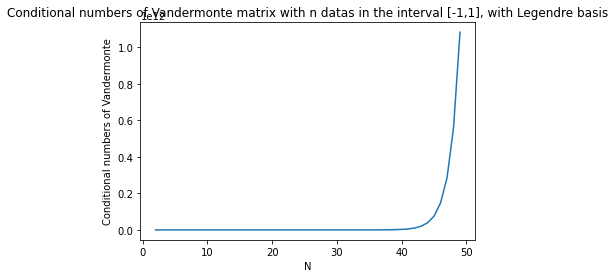

In [35]:
plt.plot(nl,cdl)
plt.xlabel("N")
plt.ylabel("Conditional numbers of Vandermonte")
plt.title("Conditional numbers of Vandermonte matrix with n datas in the interval [-1,1], with Legendre basis")

plt.show()

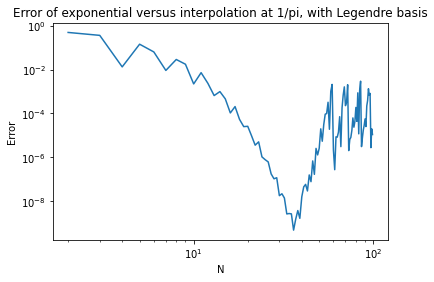

In [36]:
# Create a list of degree and a list of their conditional numbers.
nl = []
Errl = []
for j in range(2,100):
    n = j
    nl.append(n)
    xl = np.linspace(-1,1,n)
    V = Vandleg(xl,n)
    b = np.exp(xl)
    vpi = np.linalg.pinv(V)
    c = np.matmul(vpi,b)
    ip = 1/(np.pi)
    use1 = Vandleg([ip],n)
    use = np.inner(c,use1)
    err = abs(np.exp(ip)-use)
    Errl.append(err)
plt.loglog(nl,Errl)
plt.xlabel("N")
plt.ylabel("Error")
plt.title("Error of exponential versus interpolation at 1/pi, with Legendre basis")

plt.show()

Again, there's some weird behavior. But luckily our 2d graph also explains it.

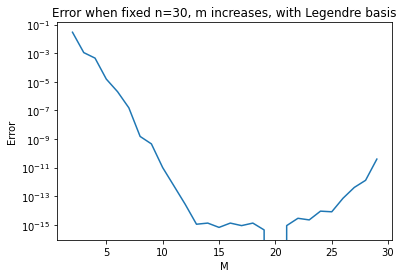

In [37]:
n = 30
# Create a list of degree and a list of their conditional numbers.
ml = []
Errl = []
for m in range(2,30):
    ml.append(m)
    xl = np.linspace(-1,1,n)
    V = Vandleg(xl,m)
    b = np.exp(xl)
    vpi = np.linalg.pinv(V)
    c = np.matmul(vpi,b)
    ip = 1/(np.pi)
    use1 = Vandleg([ip],m)
    use = np.inner(c,use1)
    err = abs(np.exp(ip)-use)
    Errl.append(err)
plt.semilogy(ml,Errl)
plt.xlabel("M")
plt.ylabel("Error")
plt.title("Error when fixed n=30, m increases, with Legendre basis")

plt.show()

In [38]:
# Create a list of degree and a list of their conditional numbers.
Error = np.empty([100,100])
nl = []
ml = []
for j in range(2,100):
    for m in range(1,j+1):
        n = j
        nl.append(n)
        ml.append(m)
        xl = np.linspace(-1,1,n)
        V = Vandleg(xl,m)
        b = np.exp(xl)
        vpi = np.linalg.pinv(V)
        c = np.matmul(vpi,b)
        ip = 1/(np.pi)
        use1 = Vandleg([ip],m)
        use = np.inner(c,use1)
        err = abs(np.exp(ip)-use)
        Error[m,n] = err

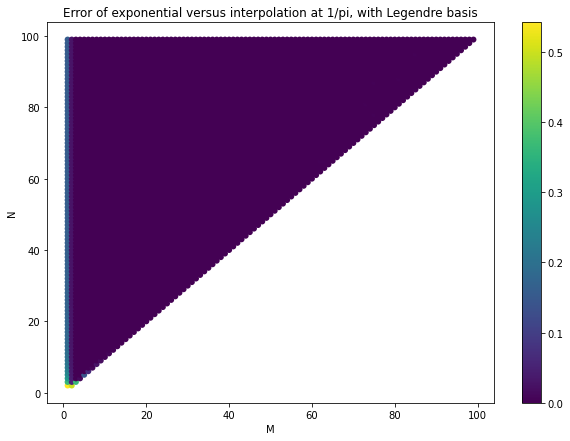

Text(0.5, 1.0, 'Log sized Error of exponential versus interpolation at 1/pi, with Legendre basis')

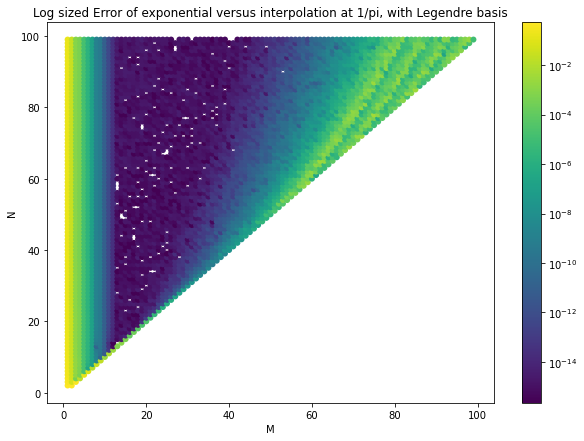

In [39]:
fig = plt.figure(figsize=(10,7))
plt.scatter(ml,nl,edgecolors='none',c=Error[ml,nl])
plt.colorbar()
plt.xlabel("M")
plt.ylabel("N")
plt.title("Error of exponential versus interpolation at 1/pi, with Legendre basis")
plt.show()
fig = plt.figure(figsize=(10,7))

plt.scatter(ml,nl,edgecolors='none',c=Error[ml,nl],norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.xlabel("M")
plt.ylabel("N")
plt.title("Log sized Error of exponential versus interpolation at 1/pi, with Legendre basis")

Interestingly, as we see above, the legendre basis works extremely well when $n\gg m$, but not so when $m\sim n$. This explains observations above.

### Part C (10 points)


Redo the condition number and interpolation plots for the Chebyshev nodes obtained in class. Here you should set scale = 1 (i.e. they should be on the interval $[-1,1]$).

---

*Your answer here.  You can create some code cells as well*

In [40]:
# Create a list of degree and a list of their conditional numbers.
nl = []
cdl = []
for j in range(2,100):
    n = j
    nl.append(n)
    xll = np.linspace(-1,0,n-1)
    xl = np.cos(xll*np.pi)
    V = Vand(xl,n)
    h = np.linalg.cond(V)
    cdl.append(h)

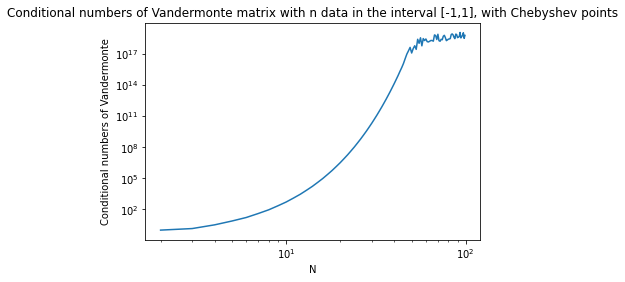

In [41]:
plt.loglog(nl,cdl)
plt.xlabel("N")
plt.ylabel("Conditional numbers of Vandermonte")
plt.title("Conditional numbers of Vandermonte matrix with n data in the interval [-1,1], with Chebyshev points")

plt.show()

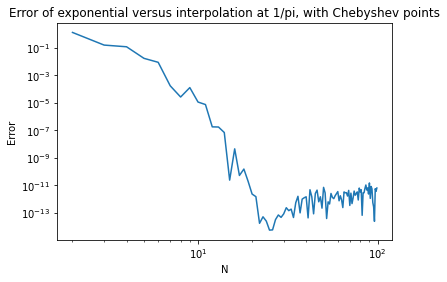

In [42]:
# Create a list of degree and a list of their conditional numbers.
nl = []
Errl = []
for j in range(2,100):
    n = j
    nl.append(n)
    xll = np.linspace(-1,0,n-1)
    xl = np.cos(xll*np.pi)
    V = Vand(xl,n)
    b = np.exp(xl)
    vpi = np.linalg.pinv(V)
    c = np.matmul(vpi,b)
    ip = 1/(np.pi)
    use1 = Vand([ip],n)
    use = np.inner(c,use1)
    err = abs(np.exp(ip)-use)
    Errl.append(err)
plt.loglog(nl,Errl)
plt.xlabel("N")
plt.ylabel("Error")
plt.title("Error of exponential versus interpolation at 1/pi, with Chebyshev points")

plt.show()

In [43]:
# Create a list of degree and a list of their conditional numbers.
Error = np.empty([100,100])
nl = []
ml = []
for j in range(2,100):
    for m in range(1,j+1):
        n = j
        nl.append(n)
        ml.append(m)
        xll = np.linspace(-1,0,n-1)
        xl = np.cos(xll*np.pi)
        V = Vand(xl,m)
        b = np.exp(xl)
        vpi = np.linalg.pinv(V)
        c = np.matmul(vpi,b)
        ip = 1/(np.pi)
        use1 = Vand([ip],m)
        use = np.inner(c,use1)
        err = abs(np.exp(ip)-use)
        Error[m,n] = err

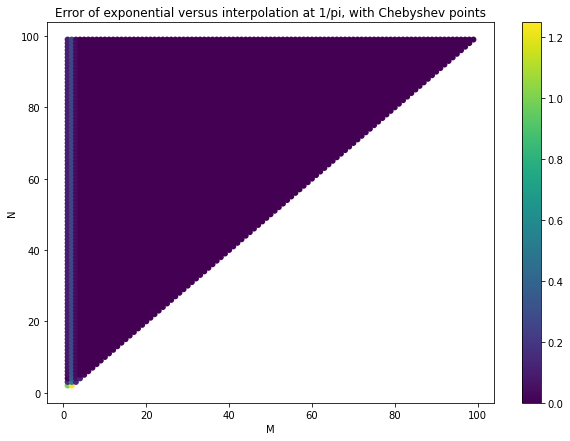

Text(0.5, 1.0, 'Log sized Error of exponential versus interpolation at 1/pi, with Chebyshev points')

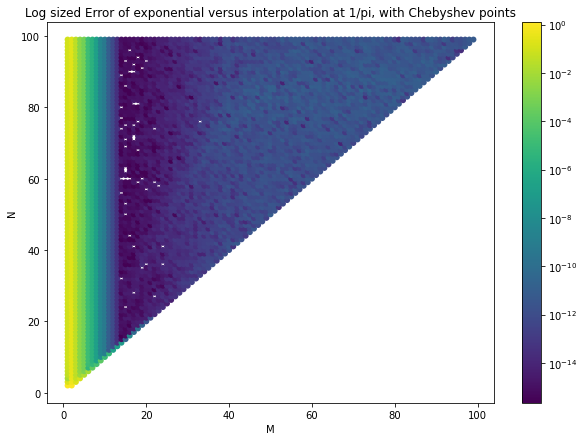

In [44]:
fig = plt.figure(figsize=(10,7))
plt.scatter(ml,nl,edgecolors='none',c=Error[ml,nl])
plt.colorbar()
plt.xlabel("M")
plt.ylabel("N")
plt.title("Error of exponential versus interpolation at 1/pi, with Chebyshev points")
plt.show()
fig = plt.figure(figsize=(10,7))

plt.scatter(ml,nl,edgecolors='none',c=Error[ml,nl],norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.xlabel("M")
plt.ylabel("N")
plt.title("Log sized Error of exponential versus interpolation at 1/pi, with Chebyshev points")

## Problem 2 (20 points)

This problem is designed to build some familiarity with barycentric interpolation.

### Part A (10 points)

Carefully read the first 5 pages of https://people.maths.ox.ac.uk/trefethen/barycentric.pdf.

---

*Your answer here.  You can create some code cells as well*

### Part B (10 points)

Implement equation (4.2) for equispaced and Chebyshev points. Check the accuracy of interpolationg $\exp(x)$ at $x= 1/\pi.$ 

---

*Your answer here.  You can create some code cells as well*

In [45]:
# create a function with input points
def funcequi(x,xs,fs):
    n = len(xs)
    w = []
    for i in range(n):  
        # Create the list of wj
        wi = 1
        for j in range(n):
            if j != i:
                wi = wi* (xs[i]-xs[j])
        wi = 1/wi
        w.append(wi)
    nom = 0
    denom = 0
    for i in range(n):
        frac = w[i]/(x-xs[i])
        nom = nom+frac*fs[i]
        denom = denom+frac
    p = nom/denom
    return p

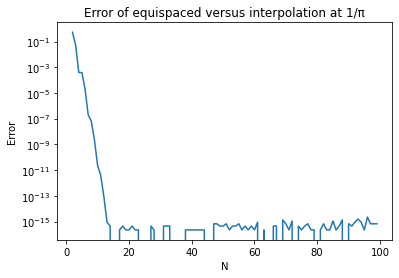

In [46]:
# Create a list of degree and a list of their conditional numbers.
nl = []
Errl = []
for j in range(2,100):
    n = j
    nl.append(n)
    xl = np.linspace(-1,1,n)
    fs = np.exp(xl)
    ip = 1/(np.pi)
    err = abs(np.exp(ip)-funcequi(ip,xl,fs))
    Errl.append(err)
plt.semilogy(nl,Errl)
plt.xlabel("N")
plt.ylabel("Error")
plt.title("Error of equispaced versus interpolation at 1/π")

plt.show()

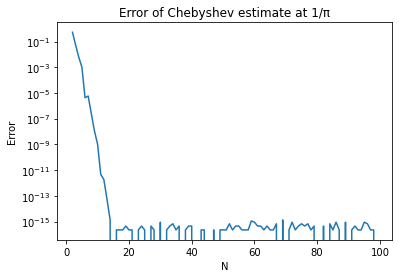

In [47]:
# Create a list of degree and a list of their conditional numbers.
nl = []
Errl = []
for j in range(2,100):
    n = j
    nl.append(n)
    xll = np.linspace(-np.pi,0,n)
    xl = np.cos(xll)
    fs = np.exp(xl)
    ip = 1/(np.pi)
    err = abs(np.exp(ip)-funcequi(ip,xl,fs))
    Errl.append(err)
plt.semilogy(nl,Errl)
plt.xlabel("N")
plt.ylabel("Error")
plt.title("Error of Chebyshev estimate at 1/π")

plt.show()

## Feedback

If you would like share how long it took you to complete this assignment, it will help adjust the difficulty for future assignments.  You're welcome to share additional feedback as well.

### So hard to debug!